<a href="https://colab.research.google.com/github/SergeiSd/Algorithms/blob/master/Laba1_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from keras.preprocessing import image
from PIL.Image import fromarray
import matplotlib.pyplot as plt

In [3]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)

# Размер мини-выборки
batch_size = 128

# Количество классов изображений
nb_classes = 10

# Количество эпох
nb_epoch = 25

#Размер изображения
img_rows, img_cols = 32, 32

# Количество каналов в изображении: RGB
img_channels = 3

# Названия классов из набора дынных CIFAR-10
classes = ['самолёт', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

170500096/170498071 [==============================] - 2s 0us/step


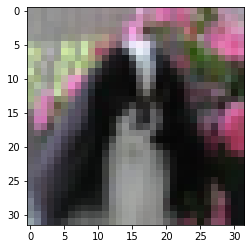

In [4]:
# Загружаем данные cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

index_img = 42
plt.imshow(fromarray(X_test[index_img]))
plt.show()

In [5]:
# Преобразование размерности изображений 
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, img_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, img_channels)


In [6]:
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

In [8]:
# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
# Первая последовательная модель
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(500, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(nb_classes, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history1 = model1.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              verbose=2)

Epoch 1/25
352/352 - 214s - loss: 1.6148 - accuracy: 0.4066 - val_loss: 1.2116 - val_accuracy: 0.5648
Epoch 2/25
352/352 - 211s - loss: 1.1817 - accuracy: 0.5770 - val_loss: 0.9723 - val_accuracy: 0.6594
Epoch 3/25
352/352 - 211s - loss: 1.0043 - accuracy: 0.6412 - val_loss: 0.8720 - val_accuracy: 0.6944
Epoch 4/25
352/352 - 212s - loss: 0.8959 - accuracy: 0.6858 - val_loss: 0.7821 - val_accuracy: 0.7310
Epoch 5/25
352/352 - 215s - loss: 0.8171 - accuracy: 0.7125 - val_loss: 0.7111 - val_accuracy: 0.7494
Epoch 6/25
352/352 - 215s - loss: 0.7608 - accuracy: 0.7332 - val_loss: 0.6926 - val_accuracy: 0.7576
Epoch 7/25
352/352 - 214s - loss: 0.7131 - accuracy: 0.7482 - val_loss: 0.6688 - val_accuracy: 0.7732
Epoch 8/25


In [96]:
# Вторая последовательная модель 
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(500, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(nb_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history2 = model2.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              verbose=2)

Epoch 1/25
352/352 - 4s - loss: 1.6312 - accuracy: 0.3990 - val_loss: 1.3243 - val_accuracy: 0.5240
Epoch 2/25
352/352 - 3s - loss: 1.2667 - accuracy: 0.5448 - val_loss: 1.0748 - val_accuracy: 0.6126
Epoch 3/25
352/352 - 3s - loss: 1.0847 - accuracy: 0.6146 - val_loss: 0.9403 - val_accuracy: 0.6770
Epoch 4/25
352/352 - 3s - loss: 0.9623 - accuracy: 0.6601 - val_loss: 0.8330 - val_accuracy: 0.7084
Epoch 5/25
352/352 - 3s - loss: 0.8713 - accuracy: 0.6942 - val_loss: 0.7751 - val_accuracy: 0.7338
Epoch 6/25
352/352 - 3s - loss: 0.8091 - accuracy: 0.7152 - val_loss: 0.7545 - val_accuracy: 0.7418
Epoch 7/25
352/352 - 3s - loss: 0.7653 - accuracy: 0.7313 - val_loss: 0.6856 - val_accuracy: 0.7622
Epoch 8/25
352/352 - 3s - loss: 0.7180 - accuracy: 0.7476 - val_loss: 0.6840 - val_accuracy: 0.7656
Epoch 9/25
352/352 - 3s - loss: 0.6808 - accuracy: 0.7605 - val_loss: 0.6314 - val_accuracy: 0.7824
Epoch 10/25
352/352 - 3s - loss: 0.6474 - accuracy: 0.7728 - val_loss: 0.6323 - val_accuracy: 0.7802

In [83]:
# Третья последовательная модель 
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
model3.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(500, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(nb_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history3 = model3.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              verbose=2)

Epoch 1/25
352/352 - 4s - loss: 2.2064 - accuracy: 0.3192 - val_loss: 1.4633 - val_accuracy: 0.4734
Epoch 2/25
352/352 - 3s - loss: 1.4849 - accuracy: 0.4637 - val_loss: 1.2856 - val_accuracy: 0.5414
Epoch 3/25
352/352 - 3s - loss: 1.3118 - accuracy: 0.5314 - val_loss: 1.1281 - val_accuracy: 0.6052
Epoch 4/25
352/352 - 3s - loss: 1.1841 - accuracy: 0.5796 - val_loss: 1.0867 - val_accuracy: 0.6152
Epoch 5/25
352/352 - 3s - loss: 1.1100 - accuracy: 0.6081 - val_loss: 1.0107 - val_accuracy: 0.6504
Epoch 6/25
352/352 - 3s - loss: 1.0328 - accuracy: 0.6391 - val_loss: 0.8870 - val_accuracy: 0.6958
Epoch 7/25
352/352 - 3s - loss: 0.9851 - accuracy: 0.6520 - val_loss: 0.8837 - val_accuracy: 0.6942
Epoch 8/25
352/352 - 3s - loss: 0.9295 - accuracy: 0.6728 - val_loss: 0.8406 - val_accuracy: 0.7046
Epoch 9/25
352/352 - 3s - loss: 0.8921 - accuracy: 0.6868 - val_loss: 0.8130 - val_accuracy: 0.7188
Epoch 10/25
352/352 - 3s - loss: 0.8672 - accuracy: 0.6931 - val_loss: 0.7800 - val_accuracy: 0.7274

In [84]:
# Четвертая последовательная модель 
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
model4.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(500, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(nb_classes, activation='softmax'))

model4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history4 = model4.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              verbose=2)

Epoch 1/25
352/352 - 4s - loss: 3.0721 - accuracy: 0.1041 - val_loss: 2.2963 - val_accuracy: 0.1138
Epoch 2/25
352/352 - 3s - loss: 2.2781 - accuracy: 0.1296 - val_loss: 2.1693 - val_accuracy: 0.2038
Epoch 3/25
352/352 - 3s - loss: 1.9742 - accuracy: 0.2760 - val_loss: 1.7010 - val_accuracy: 0.3848
Epoch 4/25
352/352 - 3s - loss: 1.6039 - accuracy: 0.4124 - val_loss: 1.3307 - val_accuracy: 0.5242
Epoch 5/25
352/352 - 3s - loss: 1.3566 - accuracy: 0.5111 - val_loss: 1.1692 - val_accuracy: 0.5930
Epoch 6/25
352/352 - 3s - loss: 1.2199 - accuracy: 0.5672 - val_loss: 1.0828 - val_accuracy: 0.6176
Epoch 7/25
352/352 - 3s - loss: 1.1287 - accuracy: 0.5997 - val_loss: 0.9872 - val_accuracy: 0.6628
Epoch 8/25
352/352 - 3s - loss: 1.0562 - accuracy: 0.6284 - val_loss: 0.9546 - val_accuracy: 0.6592
Epoch 9/25
352/352 - 3s - loss: 1.0045 - accuracy: 0.6475 - val_loss: 0.9071 - val_accuracy: 0.6836
Epoch 10/25
352/352 - 3s - loss: 0.9467 - accuracy: 0.6681 - val_loss: 0.8600 - val_accuracy: 0.7084

In [ ]:
# Пятая последовательная модель 
model5 = Sequential()

model5.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
model5.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(500, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(nb_classes, activation='softmax'))

model5.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history5 = model5.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              verbose=2)

In [ ]:
models_list = [model1, model2, model3, model4, model5]
predict = None 

for model in models_list:

  if predict is None:
    predict = model.predict(X_test)

  predict += model.predict(X_test)

predict /= len(models_list)

accuracy = accuracy_score(y_test, np.argmax(predict, axis=1))

print('Accuracy = {}%'.format(round(accuracy*100, 2)))


In [46]:
model_json = model.to_json()
json_file = open("Laba1_cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("Laba1_cifar10_model.h5")

In [49]:
from google.colab import files

files.download("Laba1_cifar10_model.json")
files.download("Laba1_cifar10_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>